# Seminar 4: Markov Chains, Applications and Simulations

In [103]:
import numpy as np
import scipy.stats as stats

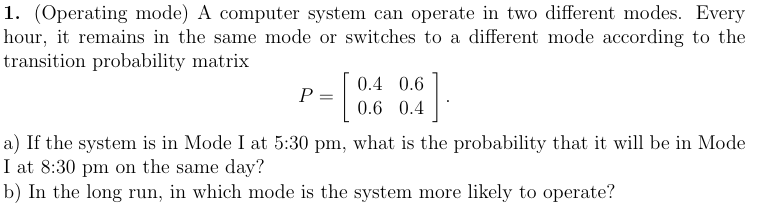

### a)
Homogenous Markov chain </br>
$$ P_i = P_0 \cdot P^{\left(i\right)} $$ </br>
8:30pm - 5:30pm = 3 hours = 3 mode switches

In [39]:
P0 = np.array([1, 0]) # i = 1 => in i'th mode
P = np.array([
    [0.4, 0.6], 
    [0.6, 0.4]
])
print(f"5:30pm, {P0}")

for i in range(3):
    P0 = P0 @ P
    print(f"{5 + i + 1}:30pm, {P0}")
print(f"Probability to be in mode I at 8:30pm on the same day: {P0[0]}")

5:30pm, [1 0]
6:30pm, [0.4 0.6]
7:30pm, [0.52 0.48]
8:30pm, [0.496 0.504]
Probability to be in mode I at 8:30pm on the same day: 0.496


In [44]:
P = np.array([
    [0.4, 0.6], 
    [0.6, 0.4]
])
np.linalg.matrix_power(P, 3)

array([[0.496, 0.504],
       [0.504, 0.496]])

b) </br>
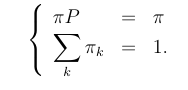

❗ Careful matrix multiplication

In [94]:
var('pi1 pi2')
P = np.array([
    [0.4, 0.6], 
    [0.6, 0.4]
])

eq1 = P[0, 0] * pi1 + P[1, 0] * pi2 - pi1
eq2 = P[0, 1] * pi1 + P[1, 1] * pi2 - pi2
eq3 = pi1 + pi2 -1

print(solve([eq1, eq2, eq3], [pi1, pi2])[0])

[pi1 == (1/2), pi2 == (1/2)]


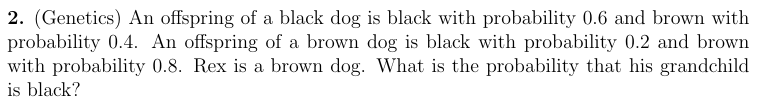

In [81]:
# 0 - black
# 1 - brown
P = np.array([
    [0.6, 0.4],
    [0.2, 0.8]
])
P0 = [0, 1]
P2 = np.linalg.matrix_power(P, 2)
(P0 @ P2)[0]

0.28

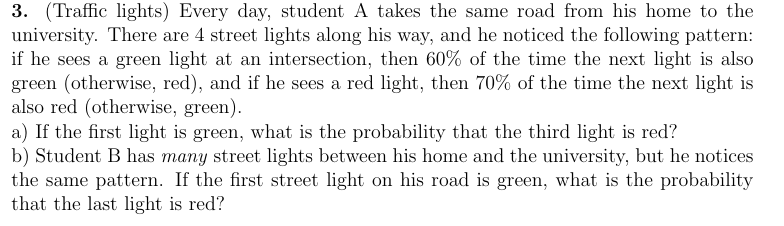

### a)

In [83]:
# 0 - green
# 1 - red
P = np.array([
    [0.6, 0.4],
    [0.3, 0.7]
])
P0 = [1, 0]
P3 = np.linalg.matrix_power(P, 2) # 3rd light is 2(two) steps after first light => ^ 2
(P0 @ P3)[1]

0.52

### b)

In [93]:
var('pi1 pi2')

P = np.array([
    [0.6, 0.4],
    [0.3, 0.7]
])

eq1 = P[0, 0] * pi1 + P[1, 0] * pi2 - pi1
eq2 = P[0, 1] * pi1 + P[1, 1] * pi2 - pi2
eq3 = pi1 + pi2 -1

print(solve([eq1, eq2, eq3], [pi1, pi2])[0][1].rhs().n())

0.571428571428571


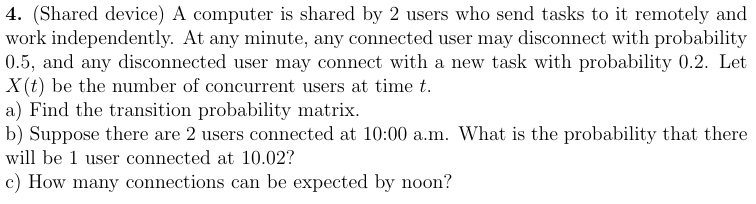

### a) Transition Probability Matrix

In [151]:
# 3 states: {0, 1, 2} = number of users connected
# state 0: Bino distribution, how many successes, given 2 trials: we want range(3) = {0, 1, 2}
P_0 = stats.binom.pmf(range(3), 2, 0.2)

# probabilities to change state from connected to disconnected
p_c_to_d = 0.5
p_c_to_c = 0.5
p_d_to_c = 0.2
p_d_to_d = 0.8

# state 1: chances from 1 connected to {0, 1, 2} connected
P_1 = np.array([
    p_c_to_d * p_d_to_d,                       # p10 
    p_c_to_d * p_d_to_c + p_c_to_c * p_d_to_d, # p11
    p_c_to_c * p_d_to_c                        # p12
])

# state 2: chances from 2 connected to {0, 1, 2} connected
P_2 = np.array([
    p_c_to_d * p_c_to_d,                       # p20
    p_c_to_d * p_c_to_c + p_c_to_c * p_c_to_d, # p21
    p_c_to_c * p_c_to_c                        # p22
])

In [150]:
P = np.array([P_0, P_1, P_2])
P

array([[0.64, 0.32, 0.04],
       [0.4 , 0.5 , 0.1 ],
       [0.25, 0.5 , 0.25]])

### b)

In [154]:
P0 = [0, 0, 1]
P2 = np.linalg.matrix_power(P, 2)
(P0 @ P2)[1]

0.45499999999999996

### c)

In [167]:
var('pi1 pi2 pi3')

eq1 = P[0, 0] * pi1 + P[1, 0] * pi2 + P[2, 0] * pi3 - pi1
eq2 = P[0, 1] * pi1 + P[1, 1] * pi2 + P[2, 1] * pi3 - pi2
eq3 = P[0, 2] * pi1 + P[1, 2] * pi2 + P[2, 2] * pi3 - pi3
eq4 = pi1 + pi2 + pi3 - 1

res = solve([eq1, eq2, eq3, eq4], [pi1, pi2, pi3])[0]
pi1_val = res[0].rhs().n()
pi2_val = res[1].rhs().n()
pi3_val = res[2].rhs().n()
# calculated E(X) here
print(f"expected connections by noon: {np.round(0 * pi1_val + 1 * pi2_val + 2 * pi3_val)}")

expected connections by noon: 1.0


In [175]:
# Create the coefficient matrix A (4x3)
A = np.vstack([
    P.T - np.eye(3),  # First 3 rows from πP = π equations
    np.ones((1, 3))   # Last row from Σπᵢ = 1 equation
])

# Create the right-hand side vector b (4x1)
b = np.array([0, 0, 0, 1])

# Solve the system Ax = b
# equivalent to x = A\b
x = np.linalg.lstsq(A, b, rcond=None)[0]

print(f"expected connections by noon: {np.round(np.sum(x * np.array([0, 1, 2])))}")

expected connections by noon: 1.0


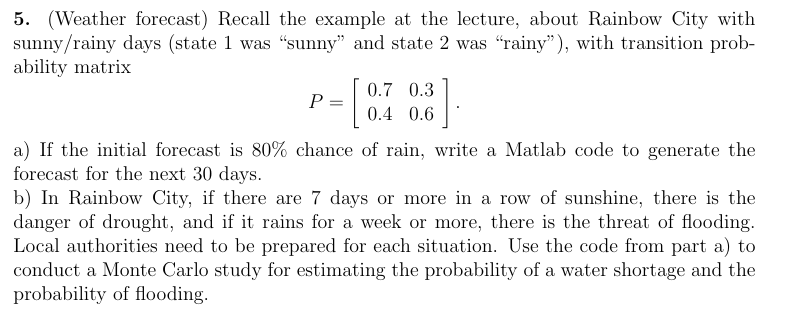

### a)

In [211]:
def simulation(P, init_state_probabilities, days):
    current_state = np.random.choice([0, 1], p=init_state_probabilities)
    forecast = [current_state]
    
    for i in range(1, days + 1):
        current_state = np.random.choice([0, 1], p=P[current_state])
        forecast.append(current_state)
        
    return forecast

In [243]:
# 0 - sunny
# 1 - rainy
P = np.array([
    [0.70, 0.30],
    [0.40, 0.60]
])
init_state_probabilities = [0.2, 0.8]
days = 30

In [232]:
forecast = simulation(P, init_state_probabilities, days)
print(forecast)

[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]


### b)

In [238]:
def test_states(a, n, value):
    current = 0
    for x in a:
        if current == n:
            return True
        if x == value:
            current += 1
        else:
            current = 0
    return False

In [245]:
N = 20000
droughts, floods = 0, 0

for i in range(N):
    forecast = simulation(P, init_state_probabilities, days)
    droughts += test_states(forecast, 7, 0)
    floods += test_states(forecast, 7, 1)

print(f"droughts chances = {float(droughts / N)}, floods chances = {float(floods / N)}")

droughts chances = 0.44845, floods chances = 0.204
